# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 線性回歸

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

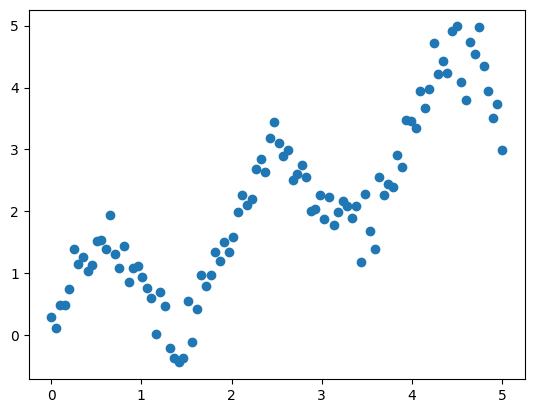

In [3]:
plt.scatter(x,y)
plt.show()

# Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$

In [4]:
regr_lin = LinearRegression()

In [5]:
# 1D轉2D
print(x.shape)
x_reshaped = x.reshape(-1, 1)
print(x_reshaped.shape)

(100,)
(100, 1)


In [6]:
# 訓練模型
regr_lin.fit(x_reshaped,y)

LinearRegression()

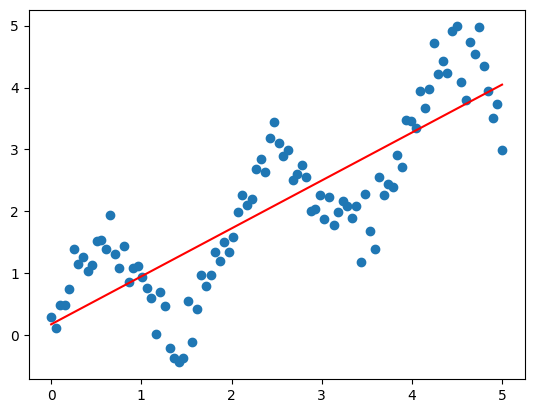

Mean Squared Error: 0.5831281897983129


In [7]:
# 預測訓練數據
y_predict = regr_lin.predict(x_reshaped)

# 繪製原始數據和預測結果
plt.scatter(x,y)
plt.plot(x, y_predict , color='r')
plt.show()

# 計算MSE
mse = np.sum((y_predict-y)**2) / len(y)
print("Mean Squared Error:", mse)

果然超級不準, 該如何是好?

# 多項式回歸

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
# 創建多項式特徵矩陣，包含 x 的多項式（最高次為 5）
x_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)
print(x_poly.shape)

(100, 5)


In [10]:
# 使用多項式特徵擬合線性迴歸模型並進行預測
regr_poly = LinearRegression()
regr_poly.fit(x_poly, y)

LinearRegression()

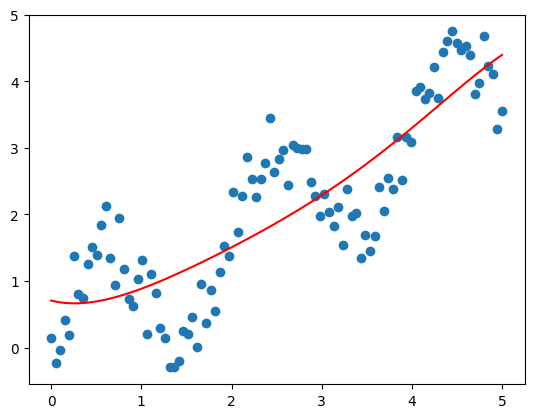

Mean Squared Error: 0.5468514049553952


In [11]:
# 繪製原始數據和多項式回歸模型的預測結果
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(x_poly), 'r')
plt.show()

# 計算MSE
y_predict = regr_poly.predict(x_poly)
mse = np.sum((y_predict - y)**2) / len(y)
print("Mean Squared Error:", mse)

In [12]:
# 輸出多項式回歸模型的係數和截距
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.3350287   0.7529067  -0.29519728  0.06051536 -0.00460001]
interception:  0.7053618494527172


In [13]:
# 用公式計算預測測試數據
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(x_poly, W.T)+b

array([0.70536185, 0.69032406, 0.67890452, 0.67088902, 0.66607242,
       0.66425847, 0.66525967, 0.66889705, 0.675     , 0.6834061 ,
       0.69396091, 0.70651783, 0.72093788, 0.73708955, 0.75484857,
       0.7740978 , 0.79472699, 0.81663262, 0.83971773, 0.8638917 ,
       0.88907012, 0.91517457, 0.94213246, 0.96987683, 0.99834619,
       1.02748433, 1.05724012, 1.08756735, 1.11842456, 1.14977481,
       1.18158558, 1.21382848, 1.24647918, 1.27951714, 1.31292549,
       1.3466908 , 1.38080295, 1.4152549 , 1.45004254, 1.48516449,
       1.52062193, 1.55641841, 1.5925597 , 1.62905356, 1.66590957,
       1.70313898, 1.74075451, 1.77877016, 1.81720103, 1.85606315,
       1.8953733 , 1.9351488 , 1.97540738, 2.01616695, 2.05744544,
       2.09926062, 2.1416299 , 2.18457019, 2.22809766, 2.27222762,
       2.31697429, 2.36235065, 2.40836823, 2.45503696, 2.50236497,
       2.5503584 , 2.59902126, 2.64835518, 2.6983593 , 2.74903004,
       2.80036095, 2.85234248, 2.90496188, 2.95820293, 3.01204

In [14]:
# 計算預測測試數據
regr_poly.predict(x_poly)

array([0.70536185, 0.69032406, 0.67890452, 0.67088902, 0.66607242,
       0.66425847, 0.66525967, 0.66889705, 0.675     , 0.6834061 ,
       0.69396091, 0.70651783, 0.72093788, 0.73708955, 0.75484857,
       0.7740978 , 0.79472699, 0.81663262, 0.83971773, 0.8638917 ,
       0.88907012, 0.91517457, 0.94213246, 0.96987683, 0.99834619,
       1.02748433, 1.05724012, 1.08756735, 1.11842456, 1.14977481,
       1.18158558, 1.21382848, 1.24647918, 1.27951714, 1.31292549,
       1.3466908 , 1.38080295, 1.4152549 , 1.45004254, 1.48516449,
       1.52062193, 1.55641841, 1.5925597 , 1.62905356, 1.66590957,
       1.70313898, 1.74075451, 1.77877016, 1.81720103, 1.85606315,
       1.8953733 , 1.9351488 , 1.97540738, 2.01616695, 2.05744544,
       2.09926062, 2.1416299 , 2.18457019, 2.22809766, 2.27222762,
       2.31697429, 2.36235065, 2.40836823, 2.45503696, 2.50236497,
       2.5503584 , 2.59902126, 2.64835518, 2.6983593 , 2.74903004,
       2.80036095, 2.85234248, 2.90496188, 2.95820293, 3.01204

# RBF回歸

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [15]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [16]:
sigma = 0.3

In [17]:
x_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])

In [18]:
regr_rbf = LinearRegression()
regr_rbf.fit(x_rbf, y)

LinearRegression()

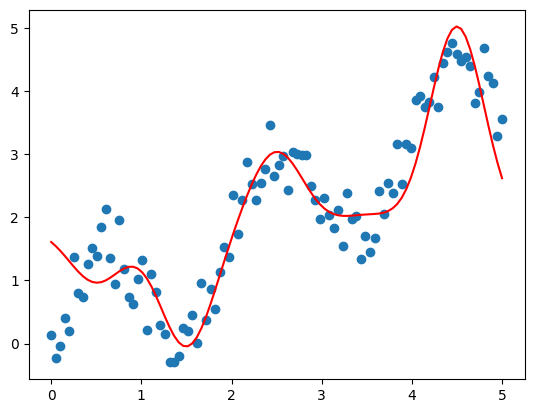

Mean Squared Error: 0.289564661588686


In [19]:
# 繪製原始數據和RBF回歸模型的預測結果
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(x_rbf), 'r')
plt.show()

# 計算MSE
y_predict = regr_rbf.predict(x_rbf)
mse = np.sum((y_predict - y)**2) / len(y)
print("Mean Squared Error:", mse)

In [20]:
# 輸出RBF回歸模型的係數和截距
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.84948484 -1.86899168  1.2224377   0.20701555  3.19972545]
interception:  1.8198433955098312


# Comparison

線性、多項式、RBF

In [21]:
Y_lin = regr_lin.predict(x_reshaped)
Y_poly = regr_poly.predict(x_poly)
Y_rbf = regr_rbf.predict(x_rbf)

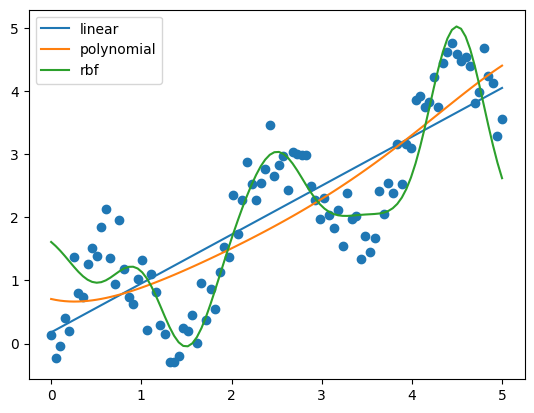

In [22]:
# 繪製原始數據和三種模型的預測結果
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()
plt.show()

## 計算模型的MSE

In [23]:
# 線性回歸MSE
print(np.sum((regr_lin.predict(x_reshaped)-y)**2) / len(y))

0.5891376413816211


In [24]:
# 多項式回歸MSE
print(np.sum((regr_poly.predict(x_poly)-y)**2) / len(y))

0.5468514049553952


In [25]:
# RBF回歸
print(np.sum((regr_rbf.predict(x_rbf)-y)**2) / len(y))

0.289564661588686
